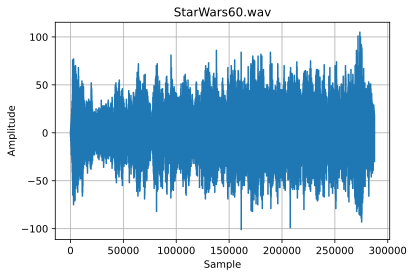

[-1. -1. -2. -2. -2. -2. -2. -2. -2. -2.]


In [19]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.signal import firwin, freqz
%config InlineBackend.figure_format='svg' #improve the quality of our plots


import wave
import sys
import scipy.signal as sig

spf = wave.open("StarWars60.wav", "r")
# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.frombuffer(signal, dtype=int)
# If Stereo
if spf.getnchannels() == 2:
    print("Just mono files")
    sys.exit(0)
plt.figure(1)
plt.title("StarWars60.wav")
sound_check=np.round(signal/1.8e7)
sound=sound_check[0:300000]

cont=0
for i in range(len(sound)):
      if (sound[i]==0):
            cont=cont+1
k=0
input_sound=np.zeros(len(sound)-cont)
for j in range (len(sound)):
    if(sound[j] != 0):
        input_sound[k]=sound[j]
        k=k+1


#Plot the wave form
plt.plot(input_sound)
plt.ylabel("Amplitude")
plt.xlabel("Sample")
plt.grid()
plt.show()

print(input_sound[0:10])


In [20]:
N = 8 #tap
fs = 11025 #sampling frequency (Hz)
fc = 0.1*fs/2 #cutoff frequency ratio
coefs = sig.firwin(N, fc, fs=fs)

def python_fir_filter(input_data, coefs):
    filter_output = np.zeros(len(input_data))
    for n in range(len(input_data)):
        for i in range(N):
            filter_output[n] += int(coefs[i]*input_data[n-i])
    return filter_output

<class 'numpy.ndarray'>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


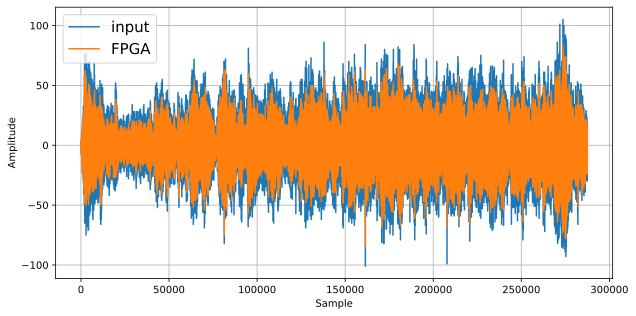

In [28]:


ciao=np.loadtxt("/Users/Alessandro/LaboratoryOfComputationalPhysics_Y3/MOD_A/Untitled_Folder/output_sound.txt")
print(type(ciao))

output_python = python_fir_filter(input_sound,coefs)
np.savetxt('output_python.txt', output_python, fmt='%d')

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(input_sound,  label = 'input')
ax.plot(ciao, label = 'FPGA')

ax.legend(loc="upper left", fontsize=15)
ax.grid()
ax.set_ylabel('Amplitude')
ax.set_xlabel('Sample')

fig.savefig('myimage.eps', format='eps', dpi=1200)

In [4]:
np.savetxt('input.txt', input_sound, fmt='%d')